In [1]:
# !pip install dtreeviz
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing  

In [2]:
df=pd.read_excel("heart_disease.xlsx",sheet_name ="Heart_disease")

In [3]:
df.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
188,63,Male,asymptomatic,126,0,False,st-t abnormality,120,False,1.5,downsloping,fixed defect,0
794,55,Male,asymptomatic,140,217,False,normal,111,True,5.6,downsloping,reversable defect,3
250,41,Male,asymptomatic,104,0,False,st-t abnormality,111,False,0.0,flat,normal,0
127,41,Male,atypical angina,120,157,False,normal,182,False,0.0,upsloping,normal,0
686,66,Male,asymptomatic,112,212,False,lv hypertrophy,132,True,0.1,upsloping,normal,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [5]:
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [6]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [7]:
df.shape

(908, 13)

In [8]:
df[df.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
765,58,Male,non-anginal,150,219,False,st-t abnormality,118,True,0.0,downsloping,normal,2


In [9]:
df = df.drop_duplicates() # Removed the duplicate value
df = df.reset_index(drop=True)

<Axes: xlabel='oldpeak', ylabel='Count'>

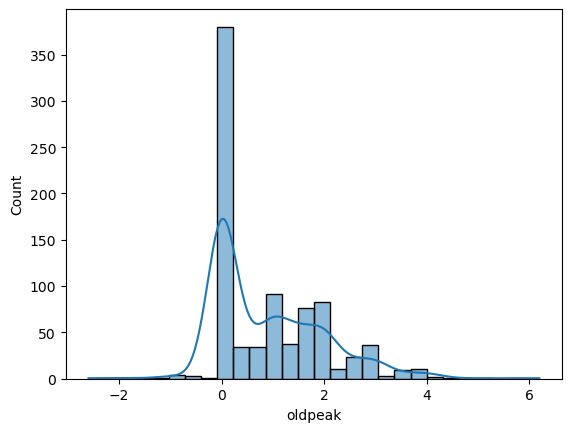

In [10]:
sns.histplot(df["oldpeak"] , kde=True)

In [11]:
# handling missing value
df['oldpeak'].fillna(df['oldpeak'].mean(), inplace=True)

In [12]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

<Axes: xlabel='age', ylabel='Count'>

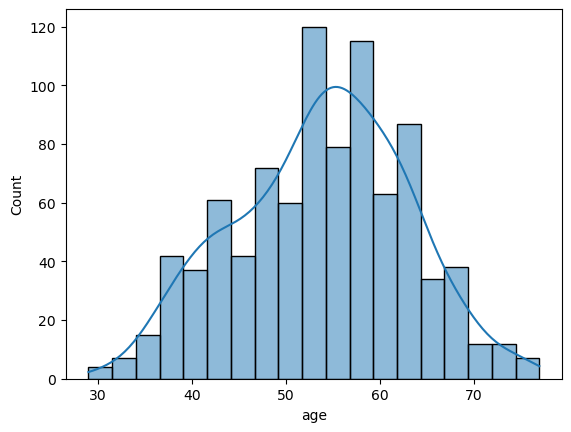

In [13]:
sns.histplot(df["age"] , kde = True)

<Axes: >

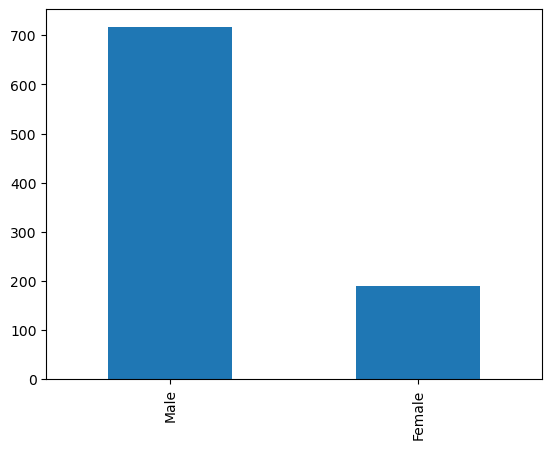

In [14]:
 df["sex"].value_counts().plot(kind = "bar")

<Axes: >

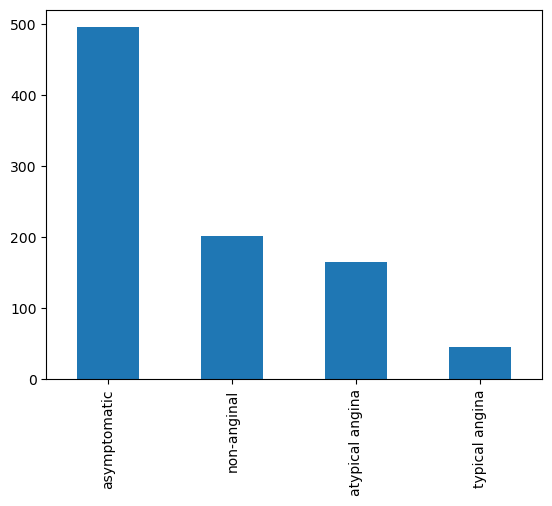

In [15]:
df["cp"].value_counts().plot(kind = "bar")

<Axes: xlabel='trestbps', ylabel='Count'>

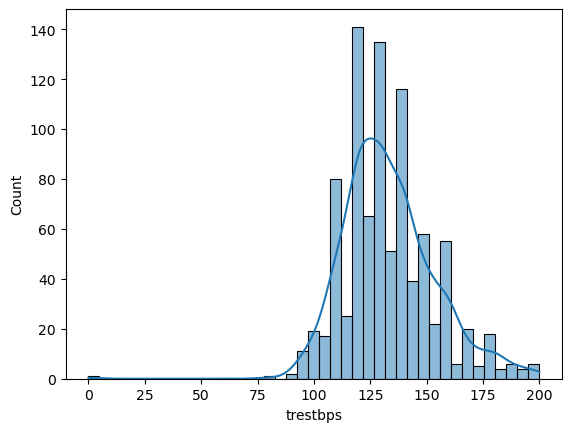

In [16]:
sns.histplot(df["trestbps"] , kde = True)

<Axes: xlabel='chol', ylabel='Count'>

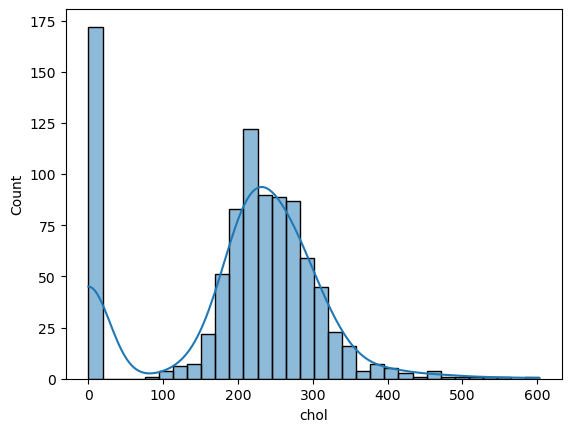

In [17]:
sns.histplot(df["chol"] , kde = True)

<Axes: >

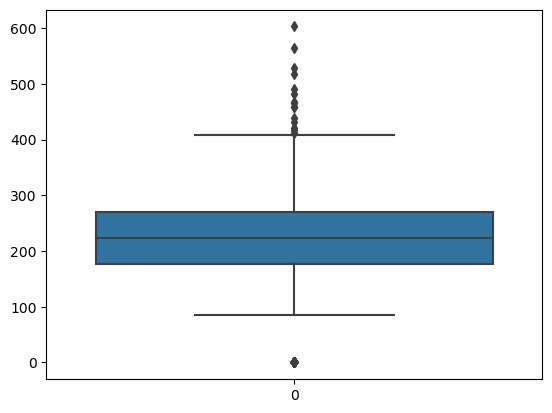

In [18]:
sns.boxplot(df["chol"])

In [19]:
df[(df["chol"] < 50)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
152,56,Male,non-anginal,120,0,False,normal,97,False,0.0,flat,reversable defect,0
176,60,Male,asymptomatic,120,0,False,normal,133,True,2.0,upsloping,reversable defect,0
185,60,Male,asymptomatic,152,0,False,st-t abnormality,118,True,0.0,upsloping,reversable defect,0
188,63,Male,asymptomatic,126,0,False,st-t abnormality,120,False,1.5,downsloping,fixed defect,0
189,53,Male,atypical angina,130,0,True,st-t abnormality,120,False,0.7,downsloping,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
892,43,Male,asymptomatic,115,0,False,normal,145,True,2.0,flat,reversable defect,4
894,55,Male,asymptomatic,120,0,False,st-t abnormality,92,False,0.3,upsloping,reversable defect,4
900,51,Male,asymptomatic,110,0,True,normal,92,False,0.0,flat,fixed defect,4
902,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4


<Axes: >

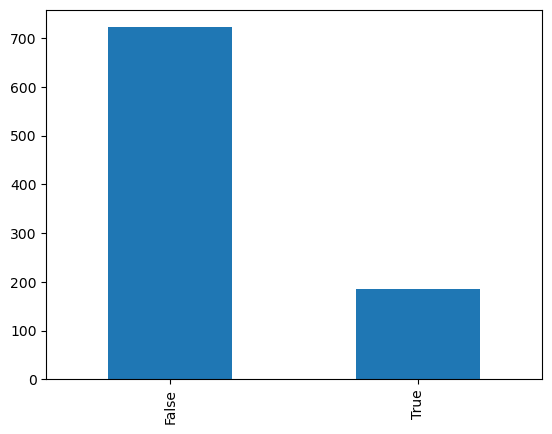

In [20]:
df["fbs"].value_counts().plot(kind = "bar")

<Axes: >

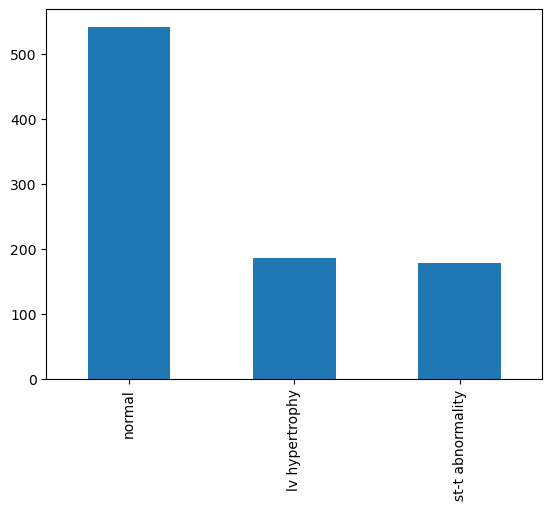

In [21]:
df["restecg"].value_counts().plot(kind = "bar")

<Axes: xlabel='thalch', ylabel='Count'>

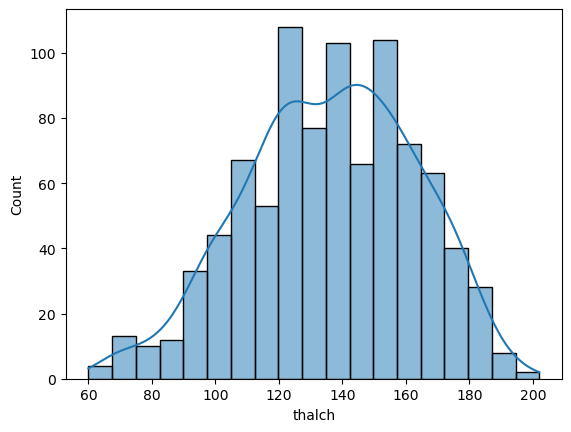

In [22]:
sns.histplot(df["thalch"] , kde = True)

<Axes: >

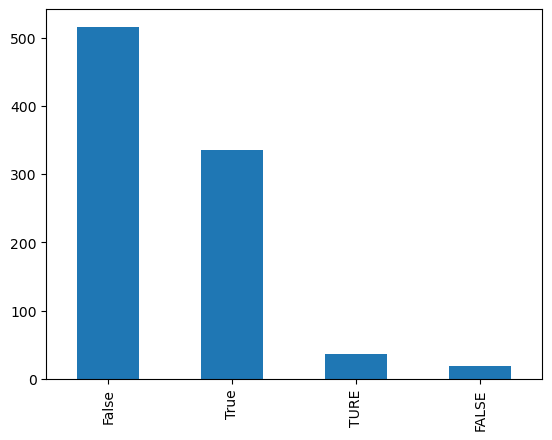

In [23]:
df["exang"].value_counts().plot(kind = "bar")

In [24]:
df["exang"]=df["exang"].replace({"TURE":True, "FALSE":False})

<Axes: xlabel='oldpeak', ylabel='Count'>

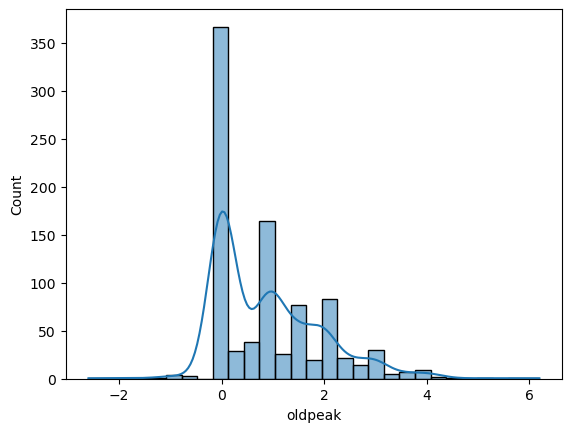

In [25]:
sns.histplot(df["oldpeak"] , kde = True)

<Axes: >

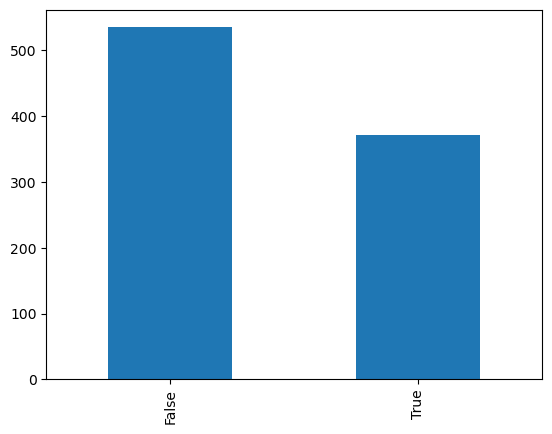

In [26]:
df["exang"].value_counts().plot(kind = "bar")

<Axes: >

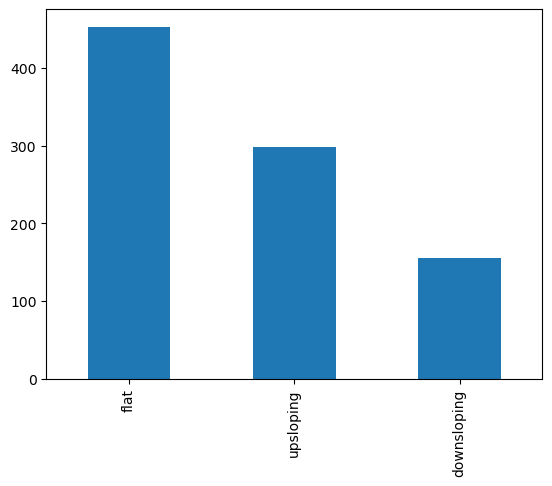

In [27]:
df["slope"].value_counts().plot(kind = "bar")

<Axes: >

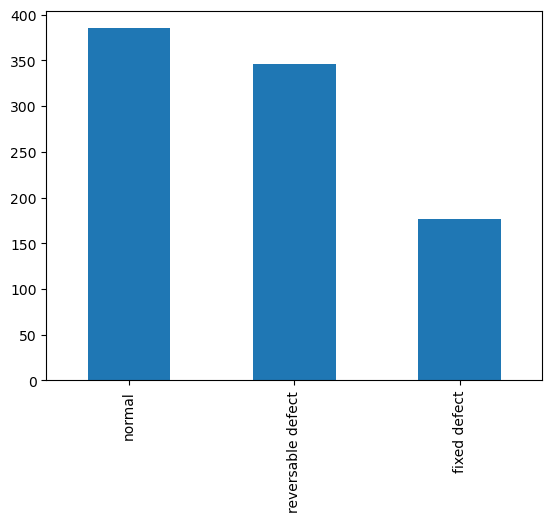

In [28]:
df["thal"].value_counts().plot(kind = "bar")

<Axes: >

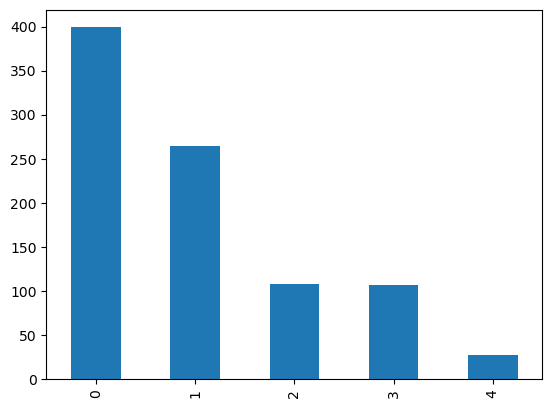

In [29]:
df["num"].value_counts().plot(kind = "bar")

<Axes: xlabel='age'>

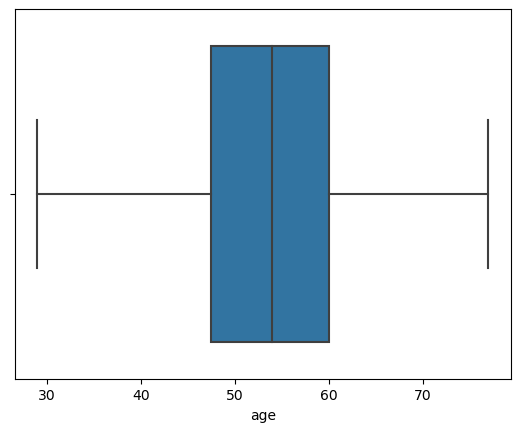

In [30]:
sns.boxplot(x = df["age"])

<Axes: xlabel='trestbps'>

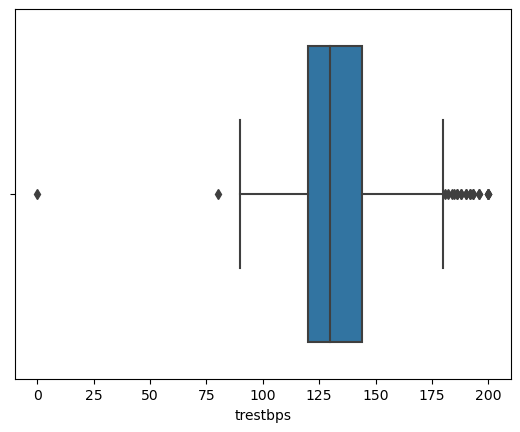

In [31]:
sns.boxplot(x = df["trestbps"])

<Axes: xlabel='chol'>

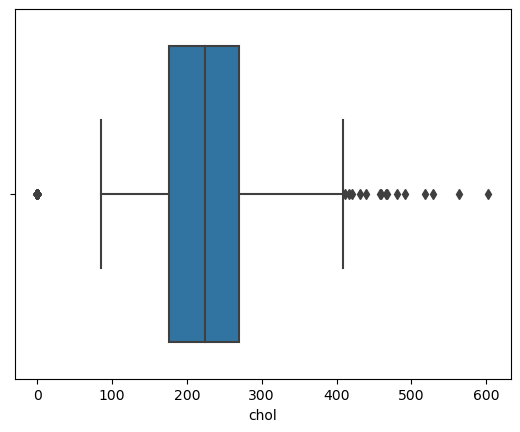

In [32]:
sns.boxplot(x = df["chol"])

<Axes: xlabel='thalch'>

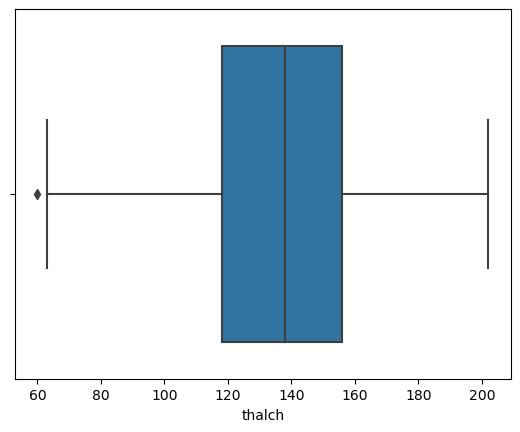

In [33]:
sns.boxplot(x = df["thalch"])

<Axes: xlabel='oldpeak'>

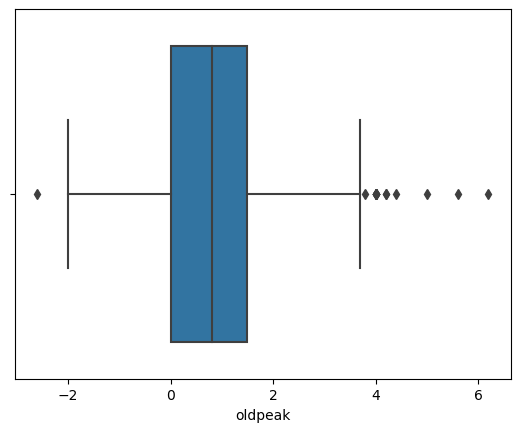

In [34]:
sns.boxplot(x = df["oldpeak"])

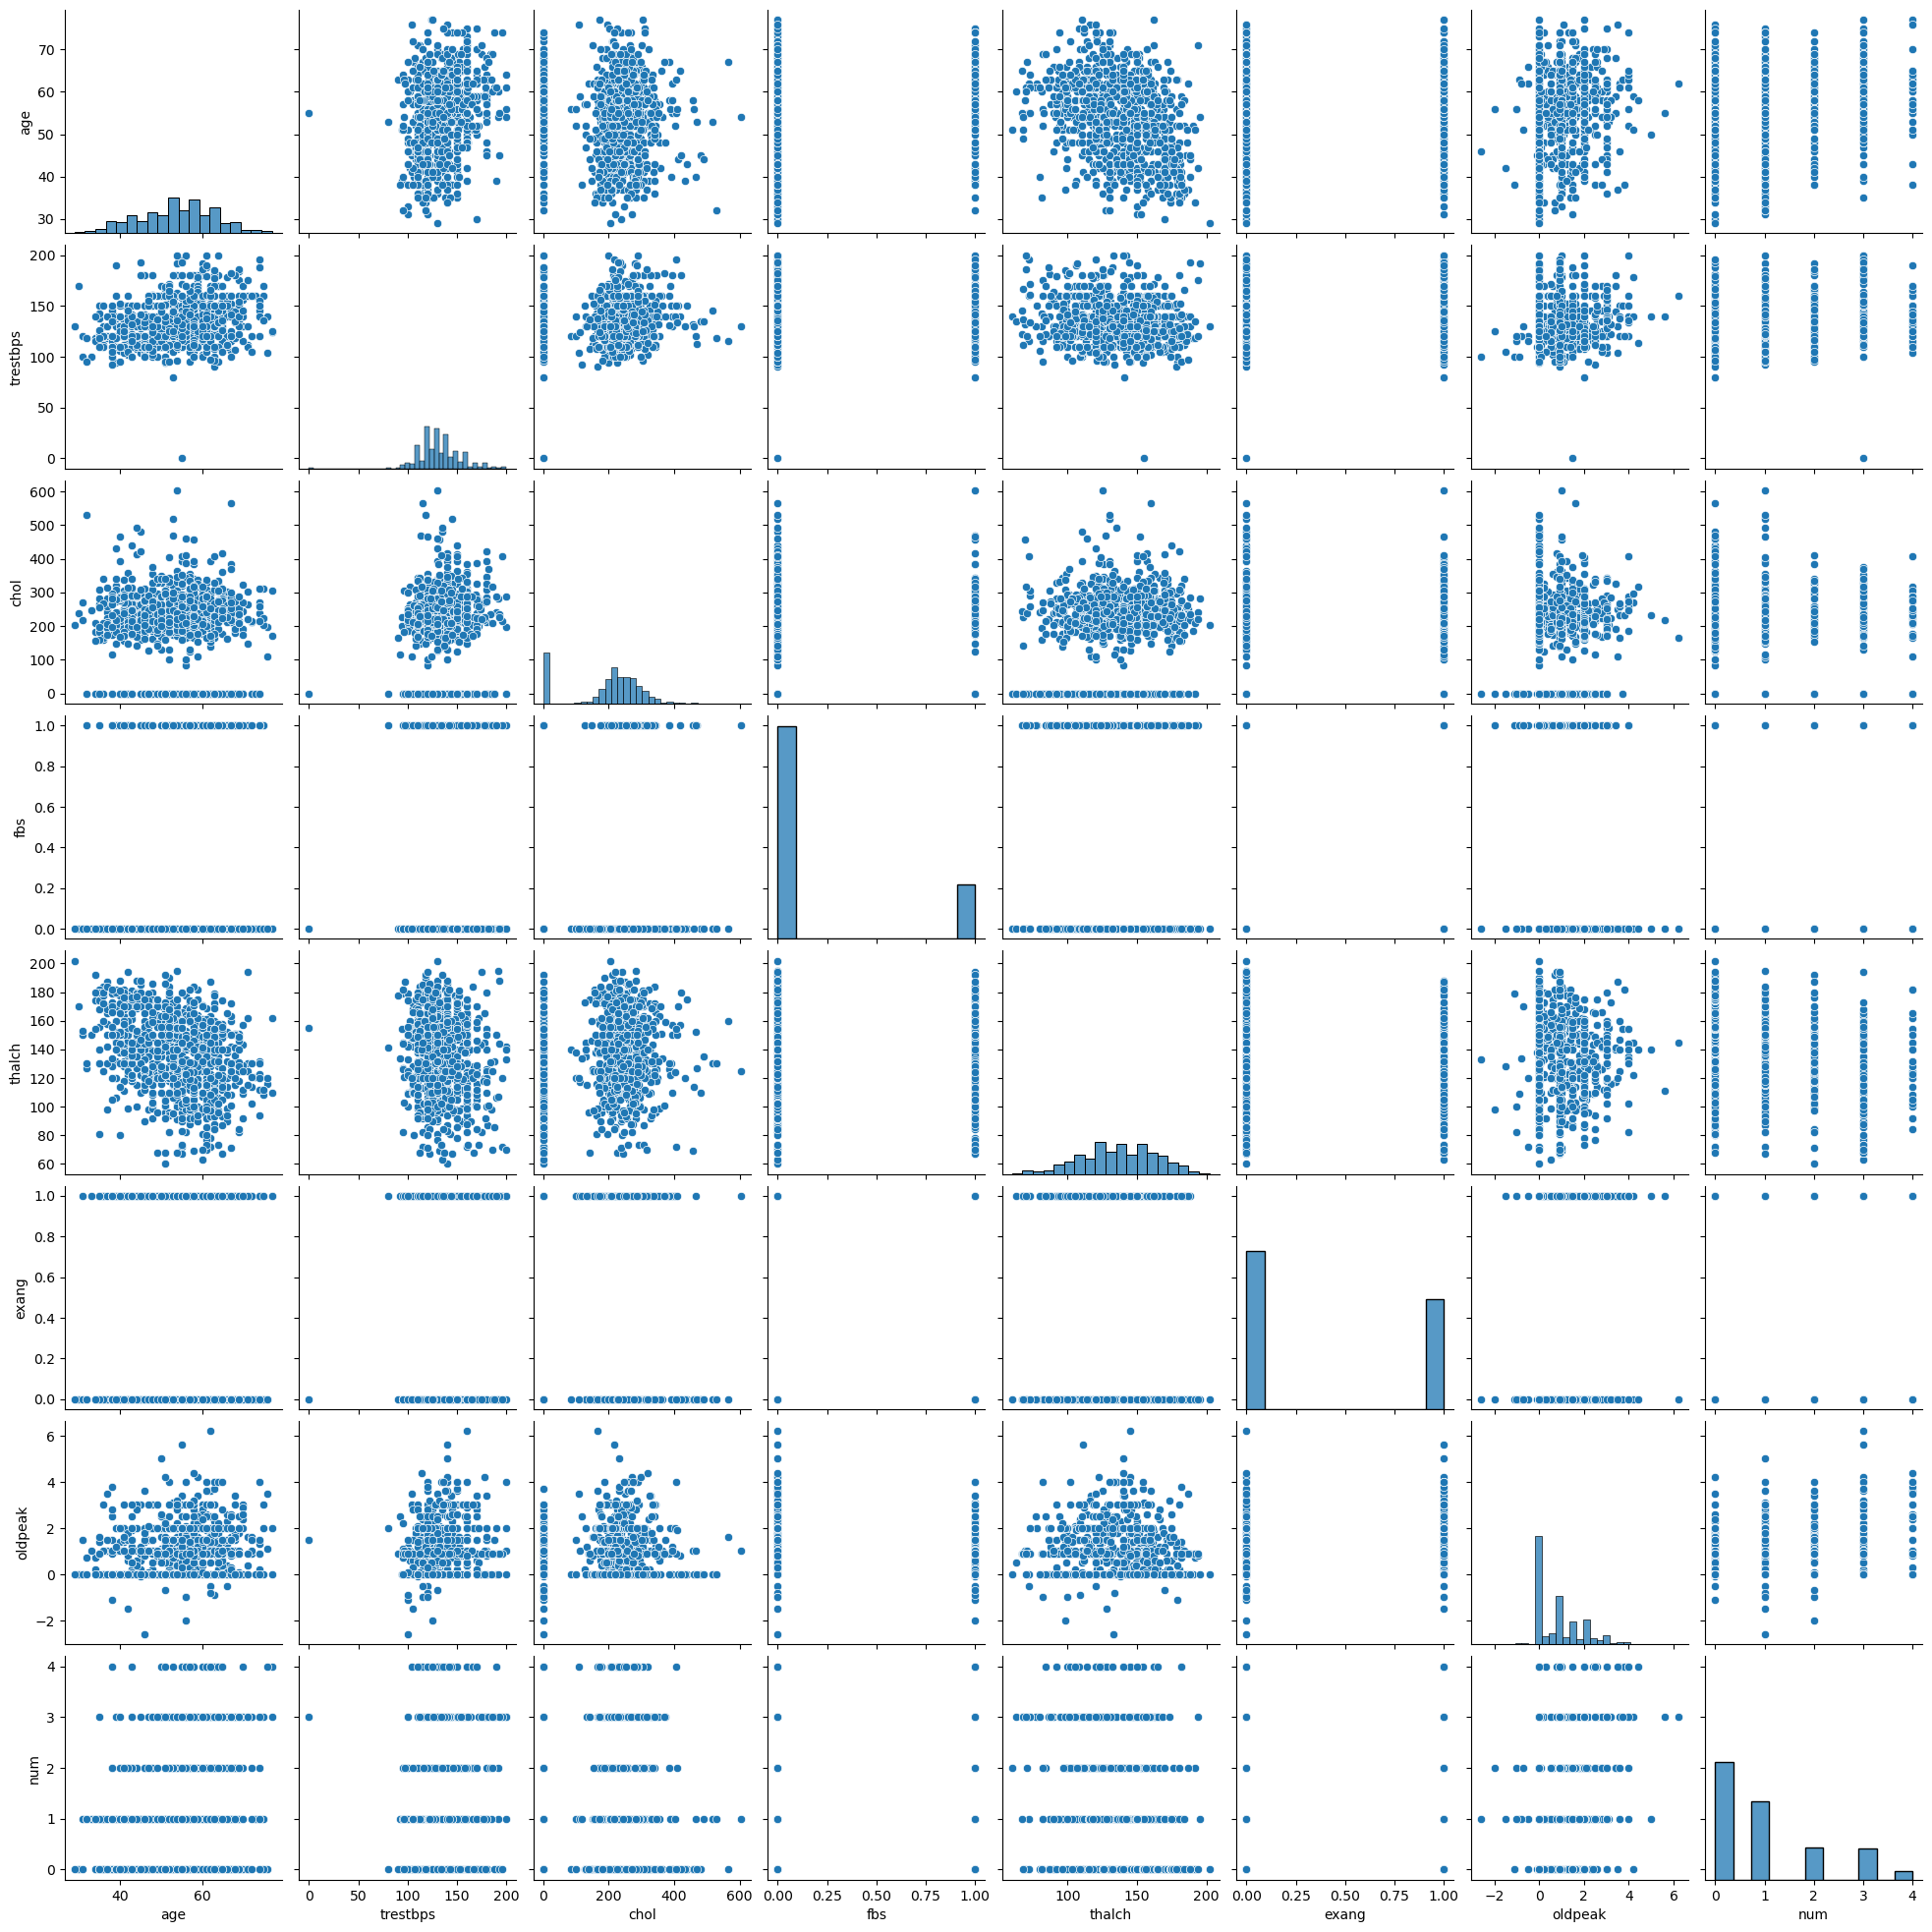

In [35]:
sns.pairplot(df)

In [36]:
df_num = df[['age','trestbps','chol','thalch','oldpeak']]
df_num.head()

,age,trestbps,chol,thalch,oldpeak
0,63,145,233,150,2.3
1,41,135,203,132,0.0
2,57,140,192,148,0.4
3,52,118,186,190,0.0
4,57,110,201,126,1.5


In [37]:
df_cat=df.select_dtypes(include=["object"])
df_cat.head()

,sex,cp,restecg,slope,thal
0,Male,typical angina,lv hypertrophy,downsloping,fixed defect
1,Male,atypical angina,normal,flat,fixed defect
2,Male,asymptomatic,normal,flat,fixed defect
3,Male,typical angina,lv hypertrophy,flat,fixed defect
4,Male,asymptomatic,normal,flat,fixed defect


In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
SS_X = scaler.fit_transform(df_num)
SS_X = pd.DataFrame(SS_X)
SS_X.columns = df_num.columns
SS_X.head()

,age,trestbps,chol,thalch,oldpeak
0,1.006097,0.568184,0.281318,0.523285,1.333786
1,-1.396447,0.077848,0.013691,-0.148399,-0.845460
2,0.350858,0.323016,-0.084439,0.448654,-0.466461
3,-0.195175,-0.755723,-0.137964,2.015918,-0.845460
4,0.350858,-1.147992,-0.004151,-0.372294,0.575787


In [39]:
df_cat = pd.get_dummies(df_cat , columns=["sex", "cp","restecg","slope","thal"], drop_first=True ,dtype=np.int32 )

In [40]:
df_cat["exang"] = df["exang"].astype(int) 

In [41]:
df_new = pd.concat([SS_X, df_cat], axis=1)
df_new.head()

,age,trestbps,chol,thalch,oldpeak,sex_Male,cp_atypical angina,cp_non-anginal,cp_typical angina,restecg_normal,restecg_st-t abnormality,slope_flat,slope_upsloping,thal_normal,thal_reversable defect,exang
0,1.006097,0.568184,0.281318,0.523285,1.333786,1,0,0,1,0,0,0,0,0,0,0
1,-1.396447,0.077848,0.013691,-0.148399,-0.845460,1,1,0,0,1,0,1,0,0,0,0
2,0.350858,0.323016,-0.084439,0.448654,-0.466461,1,0,0,0,1,0,1,0,0,0,0
3,-0.195175,-0.755723,-0.137964,2.015918,-0.845460,1,0,0,1,0,0,1,0,0,0,0
4,0.350858,-1.147992,-0.004151,-0.372294,0.575787,1,0,0,0,1,0,1,0,0,0,1


In [42]:
X = df_new

In [43]:
y = df["num"]

In [44]:
X.shape
y.shape

(907,)

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [47]:
dt = DecisionTreeClassifier(criterion='gini',max_depth=None)
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [48]:
y_pred_train = dt.predict(X_train)
y_pred_test = dt.predict(X_test)

from sklearn.metrics import accuracy_score
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 1.0
Testing Accuracy: 0.5164835164835165


In [49]:
#=========================================================
# cross validation
#=========================================================

training_acc = []
test_acc = []

for i in range(1,100):
    X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=i)
    dt.fit(X_train.values,y_train)
    y_pred_train = dt.predict(X_train.values)
    y_pred_test  = dt.predict(X_test.values)
    training_acc.append(accuracy_score(y_train,y_pred_train))
    test_acc.append(accuracy_score(y_test,y_pred_test))

import numpy as np
print("Cross validation - Training accuracy:" ,np.mean(training_acc).round(2))
print("Cross validation - Test accuracy:" ,np.mean(test_acc).round(2))



Cross validation - Training accuracy: 1.0
Cross validation - Test accuracy: 0.46


In [50]:
# Count the number of nodes in the tree
node_count = dt.tree_.node_count

# Count the depth of the tree
max_depth = dt.tree_.max_depth

print("Number of nodes:", node_count)
print("Depth of tree:", max_depth)


Number of nodes: 493
Depth of tree: 14


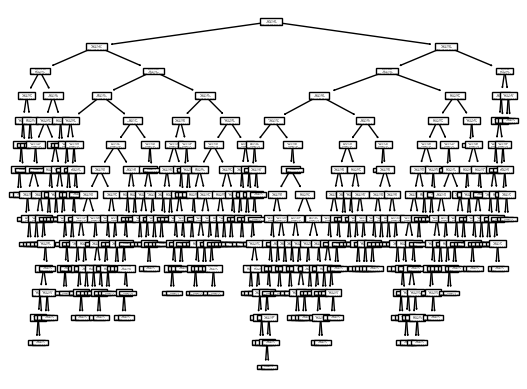

In [51]:
# prompt: plot the decision tree graph for the above model
from sklearn import tree

#PLot the decision tree
tree.plot_tree(dt);

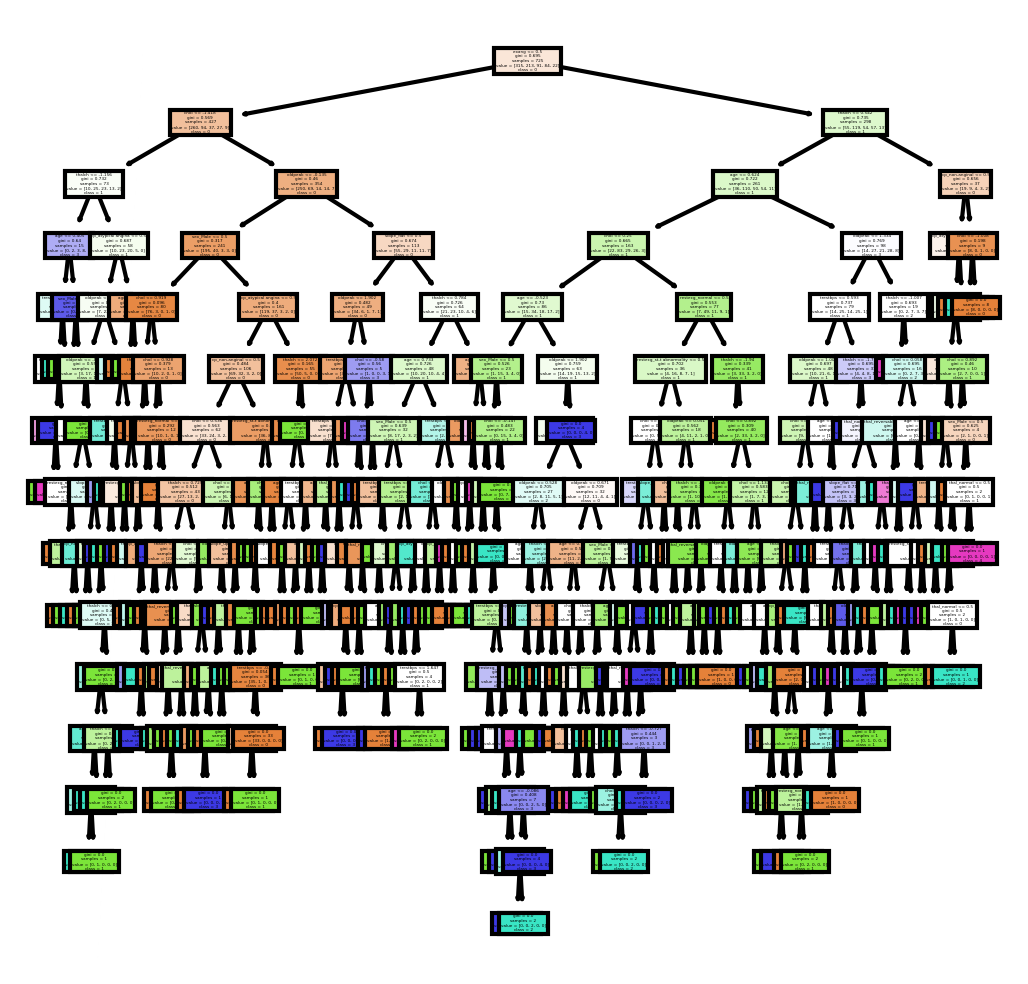

In [52]:
cn = list(map(lambda x : str(x) , list(range(len(y_train.value_counts())))))
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(dt,
               feature_names = list(X_train.columns), 
               class_names=cn,
               filled = True); 

In [53]:

from sklearn.model_selection import GridSearchCV
num_arr = [i for i in range(1 , len(X.columns))]
params = {"criterion" : ('gini',"entropy", "log_loss"),"max_depth" : num_arr ,"min_samples_split" : num_arr , "min_samples_leaf" : num_arr }
my_dt = DecisionTreeClassifier(random_state=56)

clf = GridSearchCV(my_dt, params ,scoring="neg_mean_squared_error" , cv = 5 , n_jobs=-1, verbose=2 )
clf.fit(X_train, y_train)

Fitting 5 folds for each of 10125 candidates, totalling 50625 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=56), n_jobs=-1,
             param_grid={'criterion': ('gini', 'entropy', 'log_loss'),
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15],
                         'min_samples_split': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                               11, 12, 13, 14, 15]},
             scoring='neg_mean_squared_error', verbose=2)

In [54]:
clf.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'min_samples_leaf': 13,
 'min_samples_split': 2}

In [55]:
clf.best_score_

-1.2717241379310344

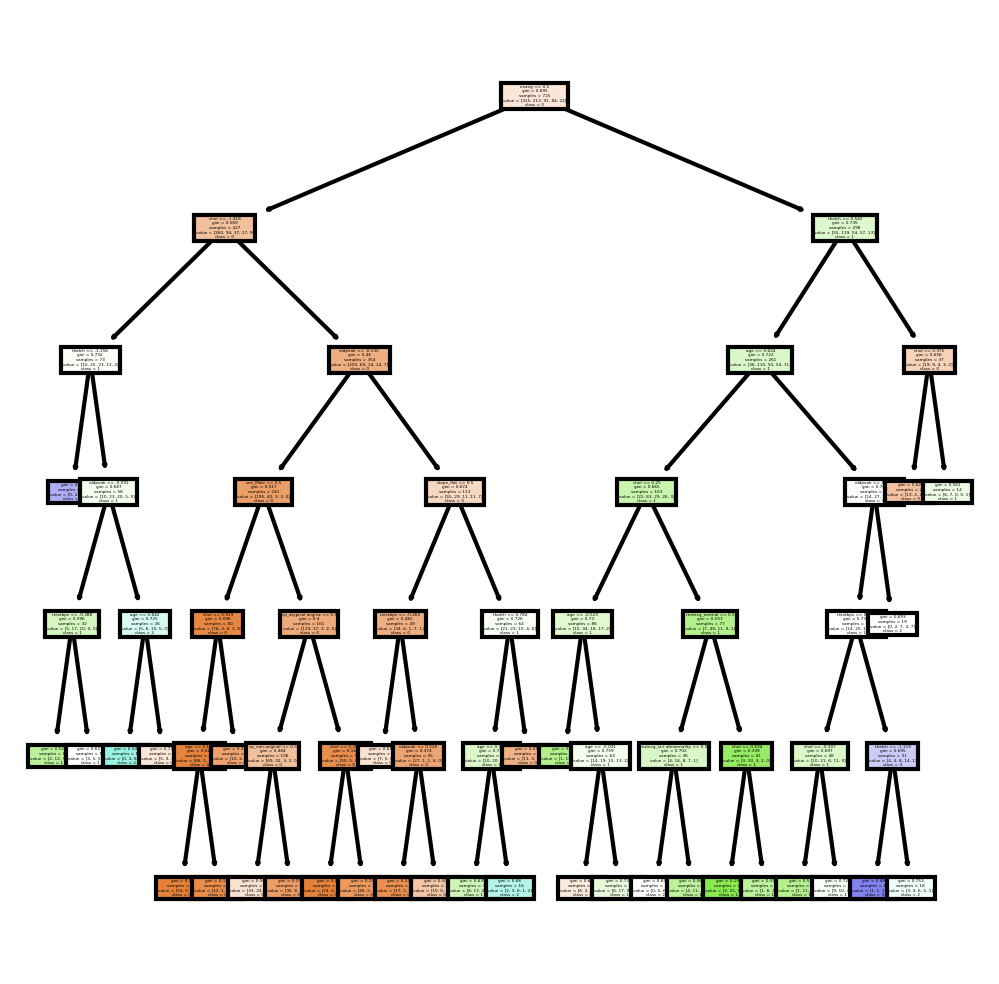

In [61]:
cn = list(map(lambda x : str(x) , list(range(len(y_train.value_counts())))))
my_dt = DecisionTreeClassifier(criterion= 'gini',max_depth = 6, min_samples_leaf = 13, min_samples_split = 2)
my_dt.fit(X_train , y_train)
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(my_dt,
               feature_names = list(X_train.columns), 
               class_names=cn,
               filled = True); 

In [74]:
def error_matrix(X_train , X_test , y_train , y_test , model) :
    from sklearn.metrics import accuracy_score , f1_score , recall_score , precision_score
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    
    print(f"Training Accuracy : {round(accuracy_score(y_train , y_train_pred),2)}")
    print(f"Testing Accuracy : {round(accuracy_score(y_test , y_test_pred),2)}")

Confusion Metrix for Training Data


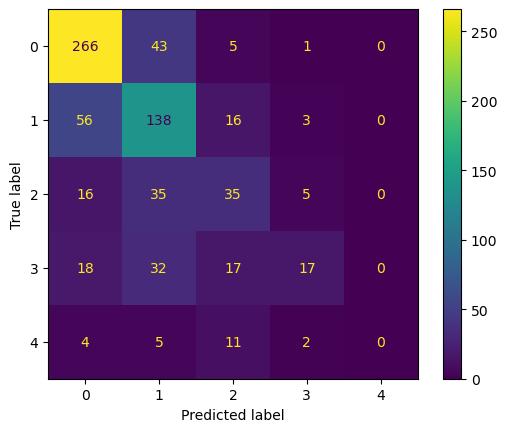

In [67]:
from sklearn.metrics import confusion_matrix , accuracy_score , classification_report , ConfusionMatrixDisplay , roc_curve , f1_score
y_test_pred = my_dt.predict(X_test)
y_train_pred = my_dt.predict(X_train)

cm = confusion_matrix(y_train , y_train_pred)
print("Confusion Metrix for Training Data")
cm = confusion_matrix(y_train, y_train_pred, labels=my_dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=my_dt.classes_)
disp.plot()
plt.show()

In [75]:
error_matrix(X_train , X_test , y_train , y_test , my_dt)

Training Accuracy : 0.63
Testing Accuracy : 0.57


Confusion Metrix for testing Data


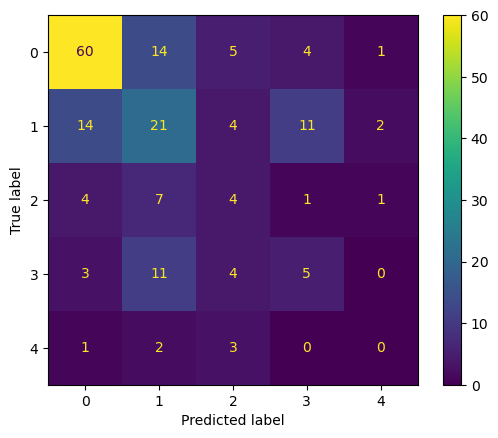

In [76]:
print("Confusion Metrix for testing Data")
cm = confusion_matrix(y_test, y_pred_test, labels=my_dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=my_dt.classes_)
disp.plot()
plt.show()

In [87]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

train_prob = my_dt.predict_proba(X_train)
dt_roc_score=roc_auc_score(y_train , train_prob , multi_class='ovr')
print("Training ROC Score" , dt_roc_score)

test_prob = my_dt.predict_proba(X_test)
dt_roc_score=roc_auc_score(y_test , test_prob , multi_class='ovr')
print("Testing ROC Score" , dt_roc_score)

Training ROC Score 0.8620823205929277
Testing ROC Score 0.7291516365962996


array([[0.13333333, 0.37777778, 0.2       , 0.24444444, 0.04444444],
       [0.07142857, 0.89285714, 0.        , 0.03571429, 0.        ],
       [0.13333333, 0.37777778, 0.2       , 0.24444444, 0.04444444],
       ...,
       [0.16666667, 0.16666667, 0.33333333, 0.27777778, 0.05555556],
       [0.6875    , 0.1875    , 0.        , 0.        , 0.125     ],
       [0.53225806, 0.38709677, 0.0483871 , 0.03225806, 0.        ]])